In [159]:
import pandas as pd

## DATA IMPORT

In [160]:
top = pd.read_csv('Resources/Top200.csv')

In [161]:
top.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


In [162]:
top.columns = top.columns.str.lower().str.replace(' ', '_')
top.rename(columns = {'artist': 'artist_name', "song_name": "track_name", "genre" : "genre_list", "chord": "key", "song_id": "track_id", "duration_(ms)": "duration_ms"}, inplace = True)
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1556 non-null   int64  
 1   highest_charting_position  1556 non-null   int64  
 2   number_of_times_charted    1556 non-null   int64  
 3   week_of_highest_charting   1556 non-null   object 
 4   track_name                 1556 non-null   object 
 5   streams                    1556 non-null   object 
 6   artist_name                1556 non-null   object 
 7   artist_followers           1545 non-null   float64
 8   track_id                   1545 non-null   object 
 9   genre_list                 1545 non-null   object 
 10  release_date               1545 non-null   object 
 11  weeks_charted              1556 non-null   object 
 12  popularity                 1545 non-null   float64
 13  danceability               1545 non-null   float

In [163]:
top[["highest_charting_position", "number_of_times_charted"]].describe()

,highest_charting_position,number_of_times_charted
count,1556.000000,1556.000000
mean,87.744216,10.668380
std,58.147225,16.360546
min,1.000000,1.000000
25%,37.000000,1.000000
50%,80.000000,4.000000
75%,137.000000,12.000000
max,200.000000,142.000000


In [164]:
top[top['number_of_times_charted'] > 85]

,index,highest_charting_position,number_of_times_charted,week_of_highest_charting,track_name,streams,artist_name,artist_followers,track_id,genre_list,...,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,duration_ms,valence,key
368,369,5,142,2019-12-27--2020-01-03,Falling,"5,294,368",Harry Styles,16112621.0,1ZMiCix7XSAbfAJlEZWMCp,"['pop', 'post-teen pop']",...,0.567,0.267,-6.502,0.0299,0.839,0.089,110.011,240133.0,0.0592,E


In [165]:
top_filtered = top[top['number_of_times_charted'] < 85].drop(columns = ['index', 'highest_charting_position', 'week_of_highest_charting', 'streams', 'artist_followers', 'genre_list', 'release_date', 'weeks_charted', 'key']).dropna()
top_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number_of_times_charted  1544 non-null   int64  
 1   track_name               1544 non-null   object 
 2   artist_name              1544 non-null   object 
 3   track_id                 1544 non-null   object 
 4   popularity               1544 non-null   float64
 5   danceability             1544 non-null   float64
 6   energy                   1544 non-null   float64
 7   loudness                 1544 non-null   float64
 8   speechiness              1544 non-null   float64
 9   acousticness             1544 non-null   float64
 10  liveness                 1544 non-null   float64
 11  tempo                    1544 non-null   float64
 12  duration_ms              1544 non-null   float64
 13  valence                  1544 non-null   float64
dtypes: float64(10), int64(1)

In [166]:
# top_filtered = top[top['number_of_times_charted'] < 85].drop(columns = ['index', 'weeks_charted', 'genre_list', 'week_of_highest_charting','release_date']).dropna()
# top_filtered.info()

In [167]:
# top_filtered['streams'] = top_filtered['streams'].str.replace(',','').astype(float)

In [168]:
top_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number_of_times_charted  1544 non-null   int64  
 1   track_name               1544 non-null   object 
 2   artist_name              1544 non-null   object 
 3   track_id                 1544 non-null   object 
 4   popularity               1544 non-null   float64
 5   danceability             1544 non-null   float64
 6   energy                   1544 non-null   float64
 7   loudness                 1544 non-null   float64
 8   speechiness              1544 non-null   float64
 9   acousticness             1544 non-null   float64
 10  liveness                 1544 non-null   float64
 11  tempo                    1544 non-null   float64
 12  duration_ms              1544 non-null   float64
 13  valence                  1544 non-null   float64
dtypes: float64(10), int64(1)

In [169]:
bins = [0, 5, 25, 53, 90]
names = ['<1 month', '1-6 months', '6-12 months', '12+ months']
names = [0, 1, 2, 3]

top_filtered['time_charted'] = pd.cut(top_filtered['number_of_times_charted'], bins, labels = names)
top_filtered.drop(columns = "number_of_times_charted", inplace = True)

print(top_filtered.info())
print(top_filtered.time_charted.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   track_name    1544 non-null   object  
 1   artist_name   1544 non-null   object  
 2   track_id      1544 non-null   object  
 3   popularity    1544 non-null   float64 
 4   danceability  1544 non-null   float64 
 5   energy        1544 non-null   float64 
 6   loudness      1544 non-null   float64 
 7   speechiness   1544 non-null   float64 
 8   acousticness  1544 non-null   float64 
 9   liveness      1544 non-null   float64 
 10  tempo         1544 non-null   float64 
 11  duration_ms   1544 non-null   float64 
 12  valence       1544 non-null   float64 
 13  time_charted  1544 non-null   category
dtypes: category(1), float64(10), object(3)
memory usage: 170.6+ KB
None
0    909
1    434
2    148
3     53
Name: time_charted, dtype: int64


In [170]:
# Bin similar keys together
# top_filtered['key'] = top_filtered['key'].replace('C#/Db', 'C#')
# top_filtered['key'] = top_filtered['key'].replace('G#/Ab', 'G#')
# top_filtered['key'] = top_filtered['key'].replace('A#/Bb', 'A#')
# top_filtered['key'] = top_filtered['key'].replace('F#/Gb', 'F#')
# top_filtered['key'] = top_filtered['key'].replace('D#/Eb', 'D#')
# top_filtered.key.value_counts()

In [171]:
top_filtered.to_csv("Resources/top200_cleaned.csv", index = False)

## DATA PREPROCESSING

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [173]:
#X = top_filtered.drop(columns = ['artist_name', 'track_name', 'track_id', 'number_of_times_charted', 'key'])
#y = top_filtered['number_of_times_charted']

In [174]:
X = top_filtered.drop(columns = ['artist_name', 'track_name', 'track_name', 'track_id', 'time_charted'])
y = top_filtered['time_charted']

In [175]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1555
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    1544 non-null   float64
 1   danceability  1544 non-null   float64
 2   energy        1544 non-null   float64
 3   loudness      1544 non-null   float64
 4   speechiness   1544 non-null   float64
 5   acousticness  1544 non-null   float64
 6   liveness      1544 non-null   float64
 7   tempo         1544 non-null   float64
 8   duration_ms   1544 non-null   float64
 9   valence       1544 non-null   float64
dtypes: float64(10)
memory usage: 132.7 KB


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [177]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## LINEAR REGRESSION

In [178]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [179]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.09160925463076841
Testing Score: 0.07004937431521652


## FEATURE REDUCTION

In [180]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [181]:
# Perform dimensionality reduction with PCA
pca = PCA(n_components=0.90)
spotify_pca = pca.fit_transform(X_train_scaled)
print(spotify_pca.shape)

(1158, 8)


[0.25692447 0.13595536 0.11134563 0.10424576 0.09930504 0.08931573
 0.07984657 0.05809604]


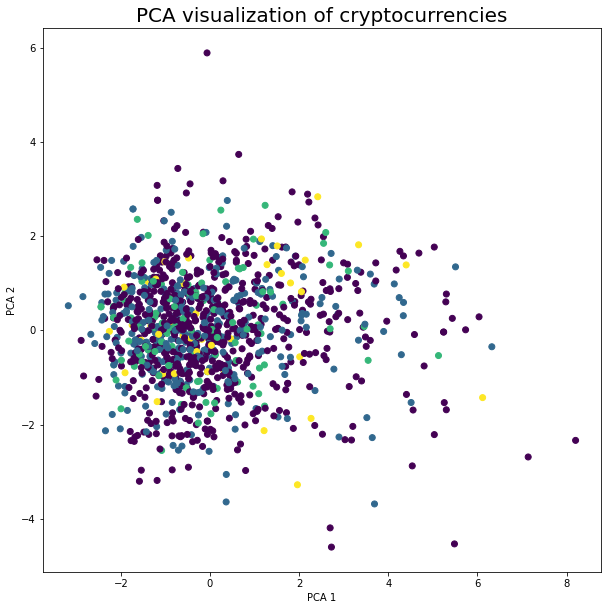

In [182]:
plt.figure(num=None, figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(spotify_pca[:, 0], spotify_pca[:, 1], c = y_train)
plt.title('PCA visualization of cryptocurrencies', fontdict={'fontsize': 20})
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
print(pca.explained_variance_ratio_)

In [183]:
# Further reduce the dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
spotify_tsne = tsne.fit_transform(spotify_pca)
print(spotify_tsne.shape)

(1158, 2)


Text(0, 0.5, 't-SNE 2')

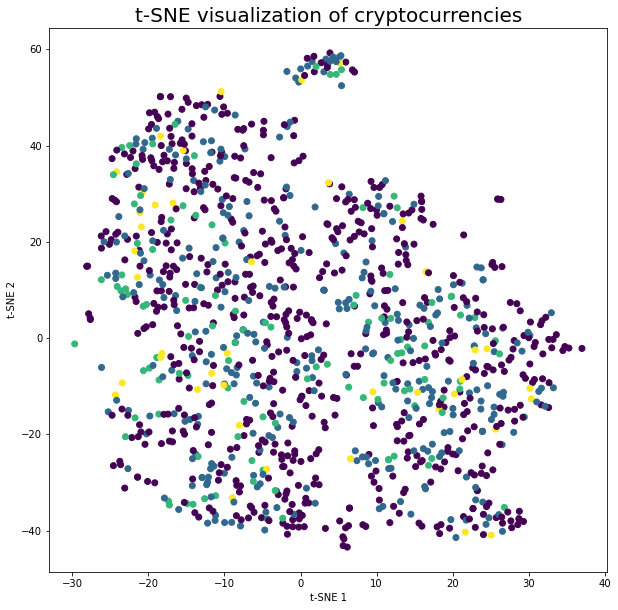

In [184]:
plt.figure(num=None, figsize=(10,10), facecolor='w', edgecolor='k')
plt.scatter(spotify_tsne[:, 0], spotify_tsne[:, 1], c = y_train)
plt.title('t-SNE visualization of cryptocurrencies', fontdict={'fontsize': 20})
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

## Check Collinearity

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.round(1)

,feature,VIF
0,popularity,18.7
1,danceability,25.3
2,energy,26.3
3,loudness,9.9
4,speechiness,2.5
5,acousticness,3.0
6,liveness,2.7
7,tempo,16.9
8,duration_ms,17.3
9,valence,8.5


In [186]:
## Remove key


## Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

lr_train_score = classifier.score(X_train_scaled, y_train)
lr_test_score = classifier.score(X_test_scaled, y_test)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.5880829015544041
Testing Data Score: 0.6243523316062176


## K Nearest Neighbors

k: 1, Train/Test Score: 0.992/0.583
k: 3, Train/Test Score: 0.731/0.573
k: 5, Train/Test Score: 0.699/0.585
k: 7, Train/Test Score: 0.670/0.606
k: 9, Train/Test Score: 0.652/0.645
k: 11, Train/Test Score: 0.634/0.640
k: 13, Train/Test Score: 0.623/0.645
k: 15, Train/Test Score: 0.613/0.630
k: 17, Train/Test Score: 0.613/0.622
k: 19, Train/Test Score: 0.613/0.635


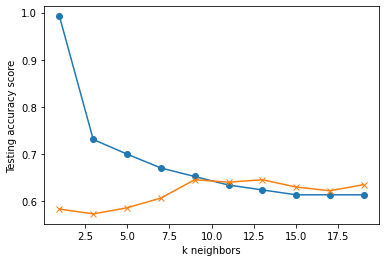

In [188]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    # print(knn)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [189]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

knn_train_score = knn.score(X_train_scaled, y_train)
knn_test_score = knn.score(X_test_scaled, y_test)

k=9 Test Acc: 0.645


In [196]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = knn.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[214,  17,   3,   0],
       [ 73,  32,   2,   0],
       [ 18,  12,   3,   0],
       [  8,   3,   1,   0]], dtype=int64)

## Random Forest Classifier

In [190]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

rf_train_score = clf.score(X_train_scaled, y_train)
rf_test_score = clf.score(X_test_scaled, y_test)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9922279792746114
Testing Score: 0.6295336787564767


## Neural Network

In [191]:
import tensorflow as tf

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = X_train_scaled.shape[1]
hid_nodes_l1 = 10
hid_nodes_l2 = 8
hid_nodes_l3 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(hid_nodes_l1, activation='relu', input_shape=(num_features,)))

# Second hidden layer
nn.add(tf.keras.layers.Dense(hid_nodes_l2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(hid_nodes_l3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 8)                 88        
                                                                 
 dense_14 (Dense)            (None, 6)                 54        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [192]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
37/37 [==============================] - 0s 857us/step - loss: 0.6857 - accuracy: 0.3212
Epoch 2/100
37/37 [==============================] - 0s 997us/step - loss: 0.6618 - accuracy: 0.3230
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.3187
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.3368
Epoch 5/100
37/37 [==============================] - 0s 834us/step - loss: 0.5829 - accuracy: 0.3351
Epoch 6/100
37/37 [==============================] - 0s 801us/step - loss: 0.5493 - accuracy: 0.3679
Epoch 7/100
37/37 [==============================] - 0s 801us/step - loss: 0.5141 - accuracy: 0.4016
Epoch 8/100
37/37 [==============================] - 0s 849us/step - loss: 0.4755 - accuracy: 0.4335
Epoch 9/100
37/37 [==============================] - 0s 872us/step - loss: 0.4341 - accuracy: 0.4620
Epoch 10/100
37/37 [==============================] - 0s 769us/step - loss: 0.3937 - accuracy: 

In [193]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - loss: -7.7914e+01 - accuracy: 0.6088 - 89ms/epoch - 7ms/step
Loss: -77.9140853881836, Accuracy: 0.6088082790374756


## Model Summary

In [194]:
summ = pd.DataFrame(
    {"models": ["Logistic Regression", "KNN", "Random Forest", "Deep Neural Net"],
     "train_accuracy": [lr_train_score, knn_train_score, rf_train_score, fit_model.history['accuracy'][-1]],
     "test_accuracy": [lr_test_score, knn_test_score, rf_test_score, model_accuracy]})

summ

,models,train_accuracy,test_accuracy
0,Logistic Regression,0.588083,0.624352
1,KNN,0.651986,0.645078
2,Random Forest,0.992228,0.629534
3,Deep Neural Net,0.582038,0.608808
